# Statistical Analysis

## Variables

While this project will include varibles such as: Country of origin, province of origin, wine variety, and winery, in its model, the main feature appears to be the price of the wine. This statistical analysis will aim to uncover if there is a statistical significance in the difference between the the least expensive wines and the most expensive wines when it comes to review score.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import  numpy as np
from scipy import stats

In [2]:
wine2 = pd.read_csv('wine_clean.csv')

## Analyzing Price Subgroups 

In [3]:
price_1 = wine2.points[wine2.price < 40]
price_2 = wine2.points[(wine2.price) >= 40 & (wine2.price < 80)]
price_3 = wine2.points[(wine2.price) >= 80 & (wine2.price < 120)]
price_4 = wine2.points[wine2.price <= 120]

The first step is to create subgroups based on price in order to compare their mean score.

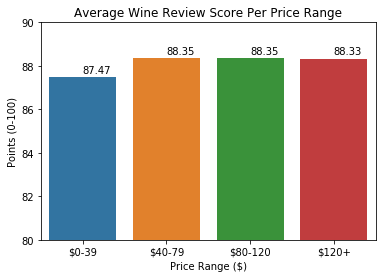

In [6]:
price_means=[round(np.mean(price_1),2),round(np.mean(price_2),2),round(np.mean(price_3),2), round(np.mean(price_4),2)]
price_means_labels= ['$0-39','$40-79','$80-120','$120+']


_= sns.barplot(x= price_means_labels, y=price_means)
plt.ylim(80,90)
plt.title('Average Wine Review Score Per Price Range')
plt.ylabel('Points (0-100)')
plt.xlabel('Price Range ($)')
for index, value in enumerate(price_means):
    plt.text(index, value+.2, str(value))
plt.show()

Creating a bar plot will help us visualize the difference in average score between these subrgroups. There seems to be a difference in the mean score from the lowest priced group to the highest priced group.

## Correlation

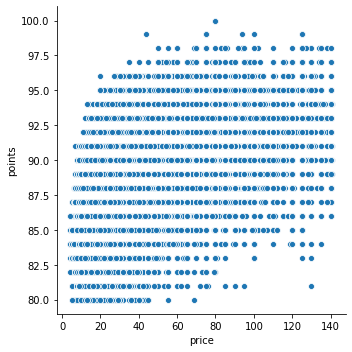

In [7]:
sns.relplot(x="price", y="points", data=wine2)
plt.show()

Creating a plot chart helps us visualise the existence of a relationship between 2 different variables. In this case, while we can see that there appears to be a positive correlation, it is not clear how strong it is.

In [8]:
np.corrcoef(x =wine2['price'] , y=wine2['points'])[0,1]


0.5454966031334959

Using the numpy method corrcoef we can find out what the correlation between these variables is. At 0.55 there appears to be a moderate positive correlation between the score received and the price of the wine. 

## Bootstrapping 

At this point we have identified 2 different things. Our data shows that there is a positive correlation between  how well a wine scores and how much the wine is priced at. Additionally, that the mean score of wine under \\$40  is lower than the mean score of wine \\$120 and over. A bootstrapping hypothesis test will help us replicate the data 10000 times to see if the difference between group 1 and group 4 exists not purely by chance. By using a Bootstrapping method we will test the following null hypothesis: with 95% confidence we can state that wine under priced \\$40 has the same mean score as wine priced \\$120 and over. The alternateive hypothesis would be that the mean score of wine priced under \\$40 is not the same as the mean score of wine priced at \\$120 and over.

In [9]:
def bs_replicate_1d(data, func, **kwargs):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample, **kwargs)

This function will create a replicate of the data and find whatever measurment we want from it (mean, standard deviation, etc)

In [10]:
def mean_diff(x0, x1):
    m0 = bs_replicate_1d(x0, np.mean)
    m1 = bs_replicate_1d(x1, np.mean)
    return m0 - m1


This function will find the difference between the means of 2 groups of data

In [12]:
mean_diffs = [mean_diff(price_1, price_4) for i in np.arange(10000)]

We find the mean differences of the replicates 10000 times

In [15]:
mean_diff_pc = np.percentile(mean_diffs, [2.5, 97.5])
mean_diff_pc

array([-0.87741538, -0.82862814])

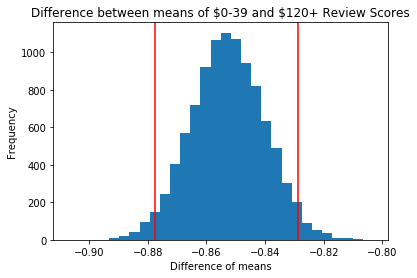

In [14]:
mean_diff_pc = np.percentile(mean_diffs, [2.5, 97.5])
mean_diff_pc

_ = plt.hist(mean_diffs, bins=30)
_ = plt.axvline(x=mean_diff_pc[0], color='r')
_ = plt.axvline(x=mean_diff_pc[1], color='r')
_ = plt.xlabel('Difference of means')
_ = plt.ylabel('Frequency')
_ = plt.title('Difference between means of \$0-39 and \$120+ Review Scores')
plt.show()


A two tailed test with a 95% confidence interval shows that the difference between the means of the two groups is between -0.88 and -0.82 

### Results

Because this interval does not include 0, at 95% we can reject the null hypothesis that the wine priced under \\$40 has a mean review score equal to that of wine priced at \\$120 and over.